In [1]:
##t-SNE

In [24]:
import tensorflow as tf
import torch
import torchvision
from torch import nn, optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config BackendInline.figure_format = 'retina'

In [3]:
## Loading the dataset
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape, "\ny_train shape", y_train.shape, "\nX_test shape", X_test.shape, "\ny_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28) 
y_train shape (60000,) 
X_test shape (10000, 28, 28) 
y_test shape (10000,)


In [4]:
X = torch.tensor(X_train, dtype=torch.float32).flatten(1)/255
Y = torch.tensor(y_train, dtype=torch.int64)
X_test_data = torch.tensor(X_test, dtype=torch.float32).flatten(1)/255
Y_test_data = torch.tensor(y_test, dtype=torch.int64)

permuts = torch.randperm(X.size(0))
X_train = X[permuts]
y_train = Y[permuts]

permuts_test = torch.randperm(X_test_data.size(0))
X_test = X_test_data[permuts_test]
y_test = Y_test_data[permuts_test]

X_train.size(), y_train.size()

(torch.Size([60000, 784]), torch.Size([60000]))

In [5]:
## making the model
input_layer = 784
hidden_layer1 = 64
hidden_layer2 = 32
output_layer = 10

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_layer, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.fc3 = nn.Linear(hidden_layer2, output_layer)
    def forward(self, x):
        fc1 = torch.relu(self.fc1(x))
        fc2 = torch.relu(self.fc2(fc1))
        fc3 = self.fc3(fc2)  
        return  fc2, fc3 




In [6]:
#training the model
def train(model,train_data,train_labels,epochs,lr = 0.01,verbose = True):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        fc2_output, final_output = model(train_data)

        
        loss = criterion(final_output, train_labels)
        loss.backward()
        optimizer.step()

        if verbose and epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss {loss.item()}')

    return loss.item(), fc2_output, final_output

In [7]:
#untrained model
untrained_model = Model()
def untrained(model,train_data,train_labels):
    hidden_layer2, final = model(train_data)
    return hidden_layer2, final

In [8]:
hidden_2_untrained, output_untrained = untrained(untrained_model,X_train,y_train)
hidden_2_untrained.size()

torch.Size([60000, 32])

In [11]:
from sklearn.manifold import TSNE

def TSNE_Plot(featuredata,y_data ,label):
    
    data = np.array([tensor.detach().numpy() for tensor in featuredata])

    # Flatten if data has more than 2 dimensions
    if data.ndim > 2:
        data = sample_data.reshape(sample_data.shape[0], -1)

    # Apply t-SNE to reduce dimensionality to 2D
    tsne_results = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42).fit_transform(data)

    # Plot the t-SNE results
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_data.numpy(), cmap='tab10', alpha=0.5,s =10)
    plt.colorbar(label='Classes')
    plt.title(label)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

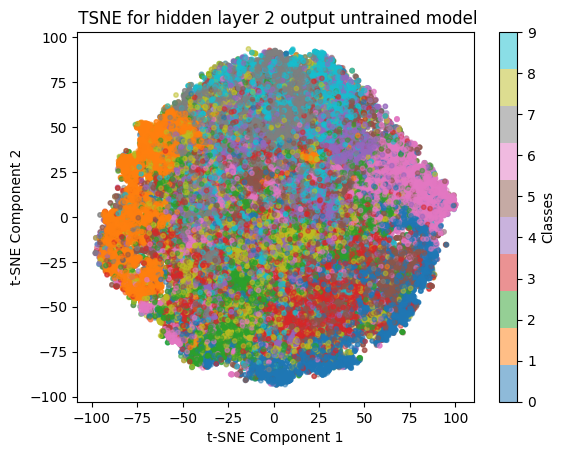

In [12]:
TSNE_Plot(hidden_2_untrained,y_train, label =" TSNE for hidden layer 2 output untrained model")

In [13]:
##trained model
Trained = Model()
loss, hidden_2 , trained_output = train(Trained, X_train, y_train,1000, 0.01, True)

Epoch 0, Loss 2.3070144653320312
Epoch 10, Loss 0.5694491267204285
Epoch 20, Loss 0.36652496457099915
Epoch 30, Loss 0.28858041763305664
Epoch 40, Loss 0.24001823365688324
Epoch 50, Loss 0.20842711627483368
Epoch 60, Loss 0.1812218427658081
Epoch 70, Loss 0.15892264246940613
Epoch 80, Loss 0.14098197221755981
Epoch 90, Loss 0.1262095868587494
Epoch 100, Loss 0.11379440128803253
Epoch 110, Loss 0.10315380245447159
Epoch 120, Loss 0.09417279809713364
Epoch 130, Loss 0.08607073873281479
Epoch 140, Loss 0.0782741978764534
Epoch 150, Loss 0.07147511839866638
Epoch 160, Loss 0.06581181287765503
Epoch 170, Loss 0.0596831776201725
Epoch 180, Loss 0.05580493062734604
Epoch 190, Loss 0.05041196569800377
Epoch 200, Loss 0.04593908414244652
Epoch 210, Loss 0.045163821429014206
Epoch 220, Loss 0.03870885819196701
Epoch 230, Loss 0.03468235209584236
Epoch 240, Loss 0.03111329674720764
Epoch 250, Loss 0.02860032394528389
Epoch 260, Loss 0.03596813604235649
Epoch 270, Loss 0.02776128426194191
Epoch 28

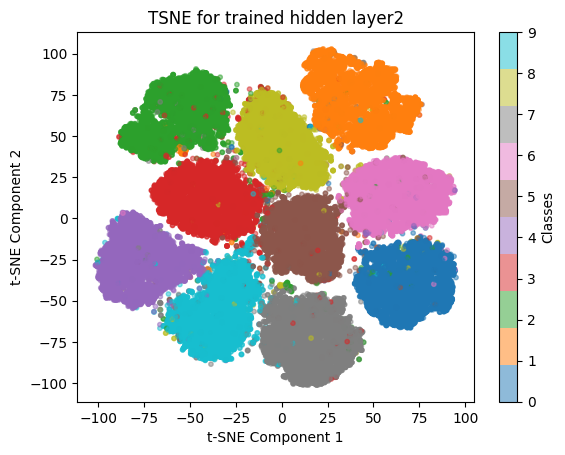

In [14]:
TSNE_Plot(hidden_2,y_train,label = "TSNE for trained hidden layer2")

We can see on the trained model the t-SNE plot clearly depicts that the classes are properly classified where as in the untrained model since it has not learned the structure from the training dataset it is not able to classify the digits which is not the case in trained model.

In [15]:
(X_train_f,y_train_f),(X_test_f,y_test_f)=tf.keras.datasets.fashion_mnist.load_data()
print("X_train shape", X_train_f.shape, "\ny_train shape", y_train_f.shape, "\nX_test shape", X_test_f.shape, "\ny_test shape", y_test_f.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28) 
y_train shape (60000,) 
X_test shape (10000, 28, 28) 
y_test shape (10000,)


In [16]:
X_f = torch.tensor(X_train_f, dtype=torch.float32).flatten(1)/255
Y_f = torch.tensor(y_train_f, dtype=torch.int64)
X_test_data_f = torch.tensor(X_test_f, dtype=torch.float32).flatten(1)/255
Y_test_data_f = torch.tensor(y_test_f, dtype=torch.int64)

permuts = torch.randperm(X_f.size(0))
X_train_f = X_f[permuts]
y_train_f = Y_f[permuts]

permuts_test = torch.randperm(X_test_data_f.size(0))
X_test_f = X_test_data_f[permuts_test]
y_test_f = Y_test_data_f[permuts_test]

X_train_f.size(), y_train_f.size()

(torch.Size([60000, 784]), torch.Size([60000]))

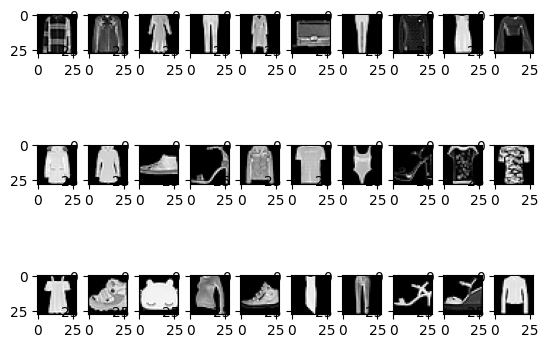

In [17]:
for i in range(1, 31):
    plt.subplot(3, 10, i)
    plt.subplots_adjust(wspace=0.3)
    plt.imshow(X_train_f[i].numpy().reshape(28, 28), cmap='gray')

In [18]:
def test(model, test_data, test_labels):
    correct = 0
    total = 0
    with torch.no_grad():
        _, outputs = model(test_data)  
        _, predicted = torch.max(outputs.data, 1)
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        print(f'total: {total}')
        print(f'correct: {correct}')
    return correct / total
test(Trained, X_test_f, y_test_f)

total: 10000
correct: 429


0.0429

In [19]:
##training fashion_Mnist
loss_mnist, Mnist_h2, Mnist_outout = train(Trained,X_train_f, y_train_f, 1000,0.01, True)


Epoch 0, Loss 64.28582000732422
Epoch 10, Loss 6.2900166511535645
Epoch 20, Loss 2.813657760620117
Epoch 30, Loss 1.8300554752349854
Epoch 40, Loss 1.3067771196365356
Epoch 50, Loss 1.0537716150283813
Epoch 60, Loss 0.9082121849060059
Epoch 70, Loss 0.8254066109657288
Epoch 80, Loss 0.7636879682540894
Epoch 90, Loss 0.7193199992179871
Epoch 100, Loss 0.6841463446617126
Epoch 110, Loss 0.656180202960968
Epoch 120, Loss 0.6334162354469299
Epoch 130, Loss 0.6142748594284058
Epoch 140, Loss 0.5977963805198669
Epoch 150, Loss 0.5833675861358643
Epoch 160, Loss 0.5706058740615845
Epoch 170, Loss 0.5591045618057251
Epoch 180, Loss 0.5486891865730286
Epoch 190, Loss 0.5391117334365845
Epoch 200, Loss 0.5302199125289917
Epoch 210, Loss 0.5219536423683167
Epoch 220, Loss 0.5142139792442322
Epoch 230, Loss 0.506957471370697
Epoch 240, Loss 0.500085175037384
Epoch 250, Loss 0.493551641702652
Epoch 260, Loss 0.48737654089927673
Epoch 270, Loss 0.4815298318862915
Epoch 280, Loss 0.47598201036453247


In [20]:
test(Trained,X_test_f, y_test_f)

total: 10000
correct: 8559


0.8559

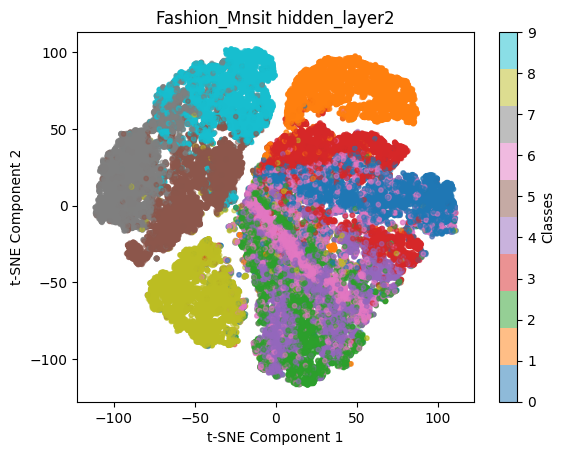

In [22]:
##tsne for trained Fashion-MNIST dataset 
TSNE_Plot(Mnist_h2 , y_train_f, label = "Fashion_Mnsit hidden_layer2")

The fashion Mnist data on the same model is not being able to classify as good as Mnist dataset , this is due to higher complex structure in fashion-Mnist dataset. For the same number of neurons in the model the fashion mnsit did not perform well eqully to the mnist dataset, maybe increasing the number of layers or neurons might help.

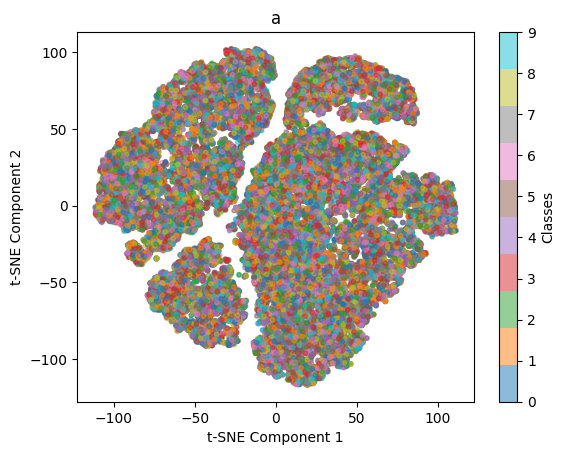

In [23]:
TSNE_Plot(Mnist_h2, y_train, label ="a")